# Data Analysis: CO2 Emissions using Python

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.linear_model import LinearRegression

What is the biggest predictor of a large CO2 output per capita of a country?

In [0]:
url = "https://raw.githubusercontent.com/owid/co2-data/refs/heads/master/owid-co2-data.csv"
df = pd.read_csv(url)

print(df.columns)

Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_chang

/root/.ipykernel/1860/command-8526338002575980-1291040859:23: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = group.corr()
/root/.ipykernel/1860/command-8526338002575980-1291040859:23: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = group.corr()
/root/.ipykernel/1860/command-8526338002575980-1291040859:23: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = group.corr()
/root/.ipykernel/1860/command-8526338002575980-1291040859:23: FutureWarni

Country,top_predictor
Afghanistan,Oil
Albania,Cement
Algeria,Gas
Andorra,Oil
Argentina,Oil
Armenia,Gas
Australia,Coal
Austria,Oil
Azerbaijan,Gas
Bangladesh,Oil


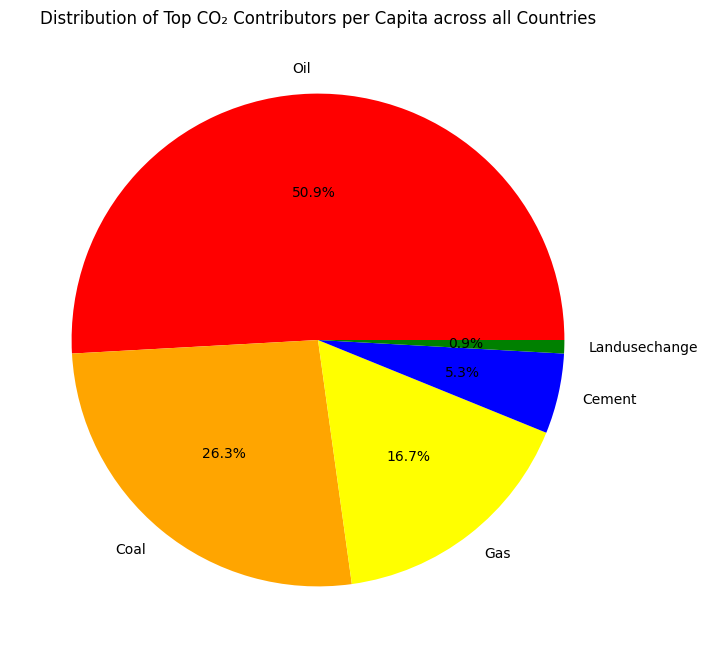

In [0]:
# Load the dataset
url = "https://raw.githubusercontent.com/owid/co2-data/refs/heads/master/owid-co2-data.csv"
df = pd.read_csv(url)

#Renaming the column names with shorter names
df = df.rename(columns={'year': 'Year', 'country': 'Country', 'iso_code': 'ISO_Code', 'co2_per_capita': 'CO2', 'coal_co2_per_capita': 'Coal', 'oil_co2_per_capita': 'Oil', 'gas_co2_per_capita': 'Gas', 'cement_co2_per_capita': 'Cement','land_use_change_co2_per_capita': 'Landusechange'})

# Select relevant columns
columns = ["Year", "Country","ISO_Code", "CO2", "Coal", "Oil", "Gas", "Cement", "Landusechange"]
df = df[columns].copy()

#To filter non-country rows
df = df.dropna(subset=["ISO_Code"])

# Filter data for years >= 2000 to get more appropriate figures
df_filtered = df[df["Year"] >= 2000].copy()

# Drop rows with missing values to ensure clean correlation calculations
df_filtered = df_filtered[["Country", "CO2", "Coal", "Oil", "Gas", "Cement", "Landusechange"]].dropna()

# Function to find the biggest predictor per country
def get_top_predictor(group):
    correlations = group.corr()
    if "CO2" in correlations:
        predictor = correlations["CO2"].drop("CO2").idxmax()  # Find highest correlation
        return predictor
    return None

# Compute the biggest predictor per country
top_predictors = df_filtered.groupby("Country").apply(get_top_predictor).dropna()
top_predictors = top_predictors.reset_index().rename(columns={0: "top_predictor"})

# Display DataFrame with country-wise top CO₂ predictor
display(top_predictors)

predictor_counts = Counter(top_predictors["top_predictor"])

# Sort by frequency
predictor_labels, predictor_values = zip(*sorted(predictor_counts.items(), key=lambda x: x[1], reverse=True))

# Plot the data
plt.figure(figsize=(8, 8))
plt.pie(predictor_values, labels=predictor_labels, autopct="%1.1f%%", colors=['red','orange','yellow','blue','green'])
plt.title("Distribution of Top CO₂ Contributors per Capita across all Countries")
plt.show()



Which countries are making the biggest strides in decreasing CO2 output?

country,co2_per_capita_earliest,co2_per_capita_latest,relative_change
Aruba,26.787,8.033,-0.7001157277783999
Curacao,34.287,10.912,-0.6817452678857876
Yemen,0.801,0.255,-0.6816479400749064
Syria,3.256,1.081,-0.667997542997543
Macao,3.494,1.481,-0.5761305094447624
Denmark,10.168,4.584,-0.5491738788355626
Gabon,4.804,2.178,-0.5466278101582015
United Kingdom,9.635,4.443,-0.5388687078360146
Finland,11.015,5.646,-0.4874262369496142
Luxembourg,19.953,10.514,-0.47306169498321055


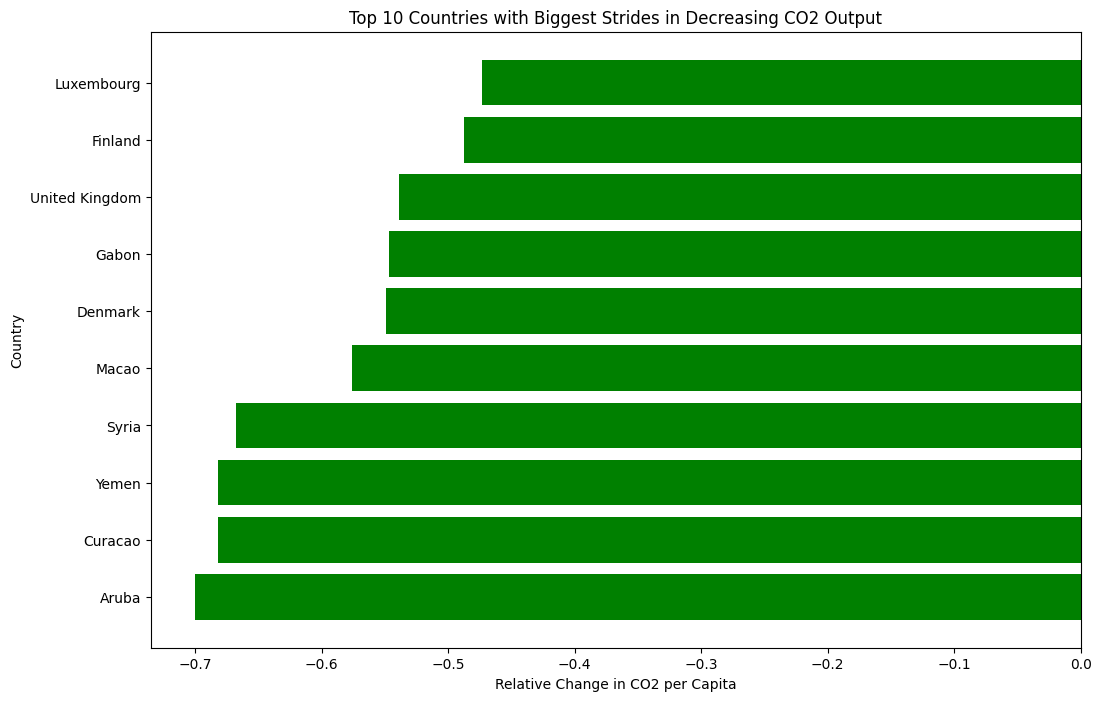

In [0]:

# Load the data
co2_data = pd.read_csv('https://raw.githubusercontent.com/owid/co2-data/refs/heads/master/owid-co2-data.csv')

#To filter non-country rows
co2_data = co2_data.dropna(subset=["iso_code"])

# Select relevant columns
columns = ["year", "country", "co2_per_capita"]
co2_data = co2_data[columns].copy()

# Drop rows with missing values in selected columns
co2_data = co2_data.dropna()

# Calculate the change in CO2 per capita for each country
co2_data['co2_per_capita_change'] = co2_data.groupby('country')['co2_per_capita'].diff()

# Filter for the most recent year and 2000 to compare the change since 2000 to the latest year
latest_year = co2_data['year'].max()
earliest_year = 2000

latest_data = co2_data[co2_data['year'] == latest_year]
earliest_data = co2_data[co2_data['year'] == earliest_year]

# Merge the earliest and latest data to calculate the change over the period
merged_data = pd.merge(earliest_data, latest_data, on='country', suffixes=('_earliest', '_latest'))

# Calculate the relative change in CO2 per capita
merged_data['relative_change'] = (merged_data['co2_per_capita_latest'] - merged_data['co2_per_capita_earliest']) / merged_data['co2_per_capita_earliest']

# Sort by the relative change to find the biggest strides in decreasing CO2 output
biggest_decrease = merged_data.sort_values(by='relative_change').head(10)

# Display the results
display(biggest_decrease[['country', 'co2_per_capita_earliest', 'co2_per_capita_latest', 'relative_change']])

# Plot the results
plt.figure(figsize=(12, 8))
plt.barh(y=biggest_decrease['country'], width=biggest_decrease['relative_change'], color='green')
plt.xlabel('Relative Change in CO2 per Capita')
plt.ylabel('Country')
plt.title('Top 10 Countries with Biggest Strides in Decreasing CO2 Output')
plt.show()

Which non-fossil fuel energy technology will have the best price in the future?

In [0]:
# Load the dataset
url = "https://raw.githubusercontent.com/owid/owid-datasets/refs/heads/master/datasets/Renewable%20energy%20costs%20(IRENA%2C%202020)/Renewable%20energy%20costs%20(IRENA%2C%202020).csv"
df = pd.read_csv(url)

# Check the columns of the dataset
print(df.columns)

Index(['Entity', 'Year', 'Onshore wind turbine nameplate capacity (MW)',
       'Onshore turbine rotor diameter (m)',
       'Total installed cost onshore wind (2019 USD/kW)',
       'Onshore wind capacity factor', 'Onshore wind LCOE (2019 USD/kWh)',
       'Total installed solar cost (2019 USD/kW)', 'Solar LCOE (2019 USD/kWh)',
       'Total installed solar cost, residential',
       'Total installed solar cost, commercial', 'Solar capacity factor',
       'Solar LCOE, residential (USD/kW)', 'Solar LCOE, commercial (USD/kW)',
       'Solar PV module price (2019 USD/W)',
       'Offshore wind average turbine rating (MW)',
       'Offshore wind average project capacity (MW)',
       'Offshore wind total installed costs (2019 USD/kW)',
       'Offshore wind capacity factor', 'Offshore wind LCOE (2019 USD/kWh)',
       'Hydro total installed costs (2018 USD/kW)',
       'Hydro total installed costs, large ',
       'Hydro total installed costs, small', 'Hydro capacity factor',
       'Hyd

In [0]:
# Load the dataset
url = "https://raw.githubusercontent.com/owid/owid-datasets/refs/heads/master/datasets/Renewable%20energy%20costs%20(IRENA%2C%202020)/Renewable%20energy%20costs%20(IRENA%2C%202020).csv"
df_renenergy = pd.read_csv(url)

# Filtering global data and only relevant columns

df_global = df_renenergy[df_renenergy['Entity'] == 'World']
df_global_filtered = df_global[['Year', 'Onshore wind LCOE (2019 USD/kWh)', 'Solar LCOE (2019 USD/kWh)','Offshore wind LCOE (2019 USD/kWh)','Hydro LCOE (219 USD/kWh)','Geothermal LCOE (219 USD/kWh)','Bioenergy LCOE (2019 USD/kWh)','CSP LCOE (2019 USD/kWh)']]	

#renaming the columns to shorter column names
df_global_filtered.rename(columns={'Onshore wind LCOE (2019 USD/kWh)': 'Onshore wind LCOE', 'Solar LCOE (2019 USD/kWh)': 'Solar LCOE', 'Offshore wind LCOE (2019 USD/kWh)': 'Offshore wind LCOE', 'Hydro LCOE (219 USD/kWh)': 'Hydro LCOE', 'Geothermal LCOE (219 USD/kWh)': 'Geothermal LCOE', 'Bioenergy LCOE (2019 USD/kWh)': 'Bioenergy LCOE', 'CSP LCOE (2019 USD/kWh)': 'CSP LCOE'}, inplace=True)

# Remove rows with missing values
df_global_filtered = df_global_filtered.dropna() #(how="all")

# Display the cleaned data
display(df_global_filtered)


/root/.ipykernel/1860/command-8892567924943429-1299536260:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_global_filtered.rename(columns={'Onshore wind LCOE (2019 USD/kWh)': 'Onshore wind LCOE', 'Solar LCOE (2019 USD/kWh)': 'Solar LCOE', 'Offshore wind LCOE (2019 USD/kWh)': 'Offshore wind LCOE', 'Hydro LCOE (219 USD/kWh)': 'Hydro LCOE', 'Geothermal LCOE (219 USD/kWh)': 'Geothermal LCOE', 'Bioenergy LCOE (2019 USD/kWh)': 'Bioenergy LCOE', 'CSP LCOE (2019 USD/kWh)': 'CSP LCOE'}, inplace=True)


Year,Onshore wind LCOE,Solar LCOE,Offshore wind LCOE,Hydro LCOE,Geothermal LCOE,Bioenergy LCOE,CSP LCOE
2010,0.086,0.3783,0.161,0.0371025023185192,0.0487856909008365,0.0755971834967537,0.3462
2012,0.083,0.2225,0.154,0.0377531622690881,0.0845356219047362,0.060869469181784,0.3525
2013,0.082,0.1751,0.177,0.0429255116677496,0.0615153448579886,0.0812622636558613,0.2681
2014,0.076,0.1636,0.183,0.0439316333227159,0.0635914117834152,0.0820690381412393,0.2432
2015,0.069,0.1264,0.169,0.0390143867021239,0.0601067742821692,0.0730284009536243,0.2508
2016,0.066,0.1139,0.146,0.0522196583086724,0.0699514567661543,0.0719323779049387,0.2903
2017,0.064,0.0924,0.131,0.0550251855930291,0.0741089584057715,0.0724324381707128,0.2533
2018,0.058,0.0787,0.127,0.044514499851478,0.0702816562405742,0.0566320767979045,0.1844
2019,0.053,0.0684,0.115,0.0472866393347343,0.0718604715042037,0.0656467075167352,0.1823


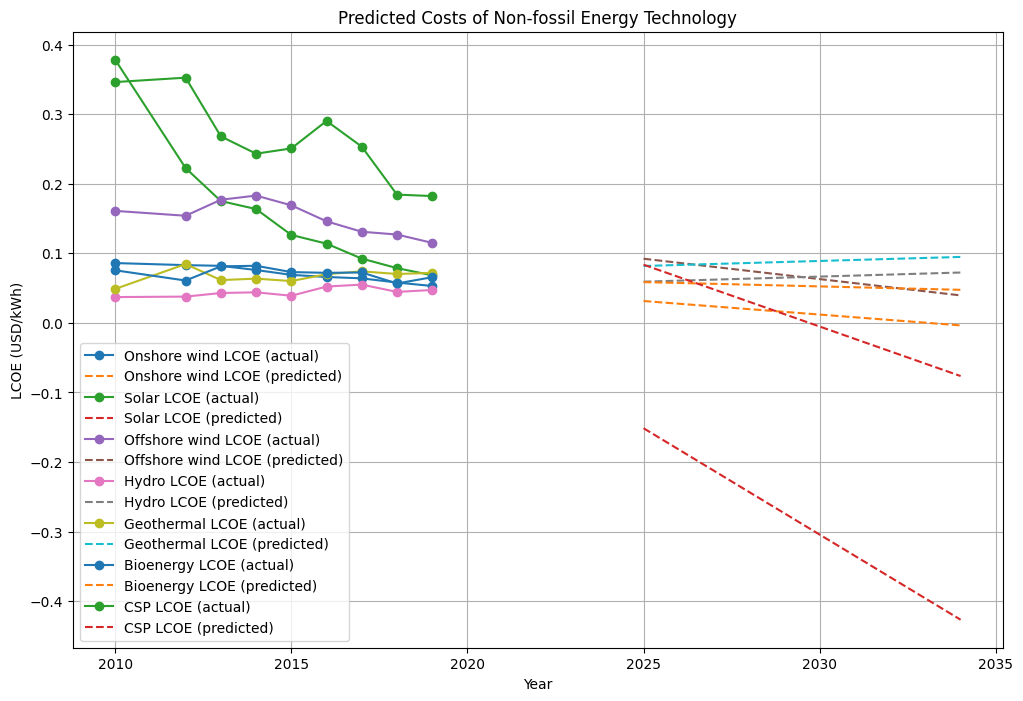


The cheapest Non-fossil energy technology in 2035 is expected to be **Solar LCOE** with a predicted cost of **$-0.4267 per kWh**.


In [0]:


# Define the renewable energy sources
energy_sources = ['Onshore wind LCOE', 'Solar LCOE', 'Offshore wind LCOE', 
                  'Hydro LCOE', 'Geothermal LCOE', 'Bioenergy LCOE', 'CSP LCOE']

# declaring the dictionary to store predictions for 2035
predicted_costs_2035 = {}

# Future years to predict
future_years = np.array(range(2025, 2035)).reshape(-1, 1)

# Plot predictions
plt.figure(figsize=(12, 8))

for source in energy_sources:
    # Prepare data
    X = df_global_filtered['Year'].values.reshape(-1, 1)  # Year as independent variable
    y = df_global_filtered[source].values  # LCOE as dependent variable

    # Train linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predict future costs
    future_predictions = model.predict(future_years)
    
    # Store the predicted cost for 2035
    predicted_costs_2035[source] = future_predictions[-1]

    # Plot actual and predicted values
    plt.plot(df_global_filtered['Year'], y, 'o-', label=f'{source} (actual)')
    plt.plot(future_years, future_predictions, '--', label=f'{source} (predicted)')

# Final visualization
plt.xlabel('Year')
plt.ylabel('LCOE (USD/kWh)')
plt.title('Predicted Costs of Non-fossil Energy Technology')
plt.legend()
plt.grid(True)
plt.show()

# Find the cheapest renewable energy technology in 2035
cheapest_technology = min(predicted_costs_2035, key=predicted_costs_2035.get)
print(f"\nThe cheapest Non-fossil energy technology in 2035 is expected to be **{cheapest_technology}** with a predicted cost of **${predicted_costs_2035[cheapest_technology]:.4f} per kWh**.")
